## Applying the STEM noise model on raw data

In [1]:
import os
import sys
import h5py
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, '../helper/')
from STEMnoise import addSTEMnoise

Load an h5 file from the *target* split get the raw simulation output

In [2]:
h5file = h5py.File("../retrieval/targets/h5/411361.010100.h5", 'r')
raw_img = np.array(h5file['haadf']['raw'])

Parameterizations of the STEM noise model explored in the printed *pngs*:

| Distortion Name | Description                                                |  Input Values by Level (*[addSTEMnoise.py](files/addSTEMnoise.py)*) |
|-----------------|:-----------------------------------------------------------|-------------:|
|raw              |simulation output for pristine structure, no postprocessing | N/A |
|clean	  |trace amount of distortion (similar to a denoised experimental image) | [0.8,400,0.75,2] |
|blur	  |source size broadening effect with Gaussian blur            | **1:** [1.8,400,0.75,2], **2:** [2.8,400,0.75,2] |
|counts (cnts)	  |noise generated to capture Poisson characteristics of the signal | **1:** [0.8,100,0.75,2], **2:** [0.8,40,0.75,2] |
|scan	  |subpixel offset in x-direction to represent scanning noise  | **1:** [0.8,400,1.00,2], **2:** [0.8,400,1.25,2] |
|background (bkgd)	  |constant additive background (from long tails of STEM probe)| **1:** [0.8,400,0.75,6], **2:** [0.8,400,0.75,10] |
|defect (dfct)     |supercell w/ point defect in center of view, + cell relaxed locally defect | **1:** defect L1 + clean, **2:** defect L2 + clean | 
|blur/background (blbk)     |combination of blur and background conditions               | **1:** [1.8,400,1.00,6], **2:** [2.8,400,1.25,10] |
|combination (comb)     |combination of several of the underlying distortion conditions   | **1:** defect L1 + [1.8,100,1.00,6], **2:** defect L1 + [2.8,100,1.25,6] |

To replicate the distortion conditions, or create additional levels of distortion on top of the raw simulation, use [addSTEMnoise.py](files/STEMnoise.py). To re-create the "clean" condition and the high-level blur from the raw simulation output:

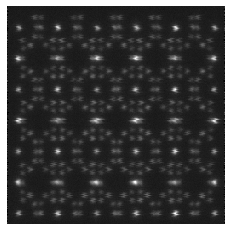

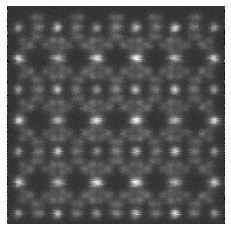

In [3]:
clean_img = addSTEMnoise(raw_img,0.8,400,0.75,2)
hi_blur_img = addSTEMnoise(raw_img,2.8,400,0.75,2)

plt.imshow(clean_img,cmap='gray'); plt.axis('off'); plt.show()
plt.imshow(hi_blur_img,cmap='gray'); plt.axis('off'); plt.show()

As less realistic extreme examples, consider the impact of significant blurring and/or major scanning distortion!

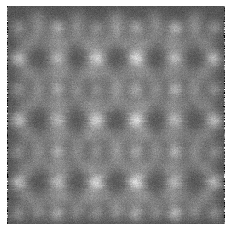

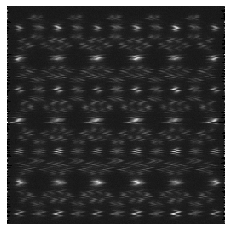

In [4]:
extreme_blur_img = addSTEMnoise(raw_img,6,400,0.75,2)
extreme_scan_img = addSTEMnoise(raw_img,1,400,2.25,2)
plt.imshow(extreme_blur_img,cmap='gray'); plt.axis('off'); plt.show()
plt.imshow(extreme_scan_img,cmap='gray'); plt.axis('off'); plt.show()